In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from read import Nw ,Ww ,Nb ,Wb ,Nk ,Wk ,Wsum, packege_Nw, packege_Nb, packege_Nk
from drawing_utility import draw_mapped_mass_from_N_vector, draw_scater_line_with_quatients, get_cur_x_of_draw_scater_line,\
    whites_draw_color,browns_draw_color,blacks_draw_color,sum_draw_color,indipendent_sum_draw_color
import statistics_utility
from statistics_of_single_ball import ball_mass_avr_b,ball_mass_avr_k,ball_mass_avr_w
from drawing_utility import show_with_heatmap, show_3D_scatter_projection
from itertools import product
import scipy.special
import tqdm
from find_map_number_of_balls_to_mass import get_distribution_of_masses_around_N_vector,get_expected_total_mass
import Statistical_model

find distribution of weight of each color of the chocolates on the package

In [2]:
pW = get_distribution_of_masses_around_N_vector(10000,packege_Nw,packege_Nb,packege_Nk)
p_value = Statistical_model.get_p_value_of_mass_vector(np.mean(pW[:,0]),np.mean(pW[:,1]),np.mean(pW[:,2]))
print(packege_Nw,packege_Nb,packege_Nk)
print(np.mean(pW[:,0]),np.mean(pW[:,1]),np.mean(pW[:,2]))
print("p_value=",p_value)

15 24 14
8.922303659652288 14.334702004821809 8.346135020811277
p_value= 0.26145019289741817


Text(0, 0.5, 'weight of brown ball group')

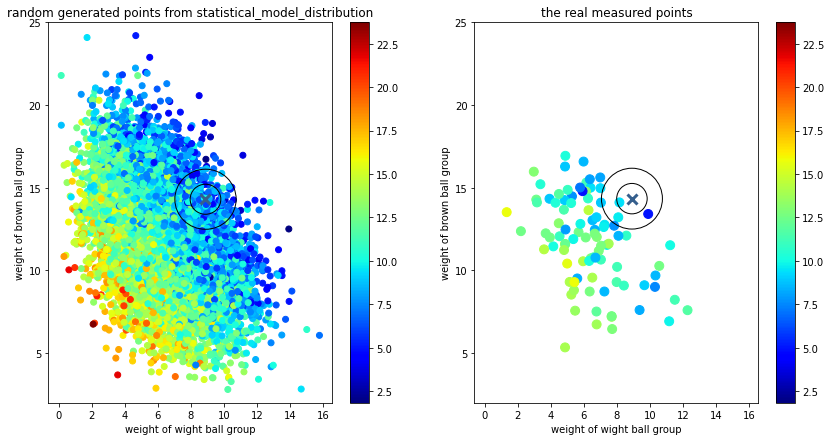

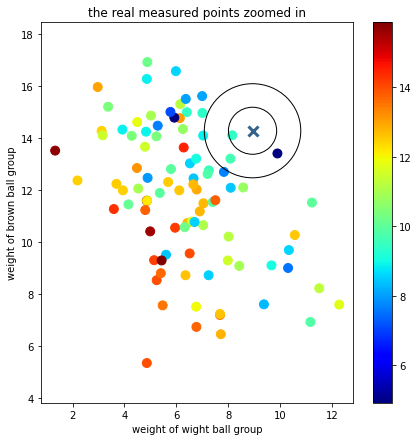

In [3]:
import Statistical_model
_,ax = plt.subplots(1,2,figsize=(14,7))
plt.sca(ax[0])
t = plt.scatter(Statistical_model.W_vector_distribution[:,0],Statistical_model.W_vector_distribution[:,1],c=Statistical_model.W_vector_distribution[:,2],cmap="jet")
plt.colorbar(t)

draw_mapped_mass_from_N_vector(packege_Nw,packege_Nb,packege_Nk,vmin=np.min(Statistical_model.W_vector_distribution[:,2]),vmax=np.max(Statistical_model.W_vector_distribution[:,2]), s=100,linewidths=3)
plt.axis("equal")
l = plt.xlim(),plt.ylim()
plt.title("random generated points from statistical_model_distribution")
plt.xlabel("weight of wight ball group")
plt.ylabel("weight of brown ball group")

plt.sca(ax[1])
t = plt.scatter(Ww,Wb,c=Wk,s=80,cmap="jet",vmin=np.min(Statistical_model.W_vector_distribution[:,2]),vmax=np.max(Statistical_model.W_vector_distribution[:,2]))
plt.colorbar(t)
draw_mapped_mass_from_N_vector(packege_Nw,packege_Nb,packege_Nk,vmin=np.min(Statistical_model.W_vector_distribution[:,2]),vmax=np.max(Statistical_model.W_vector_distribution[:,2]), s=100,linewidths=3)
plt.axis("equal")
plt.xlim(l[0])
plt.ylim(l[1])
plt.title("the real measured points")
plt.xlabel("weight of wight ball group")
plt.ylabel("weight of brown ball group")

plt.figure(figsize=(7,7))
t = plt.scatter(Ww,Wb,c=Wk,s=80,cmap="jet")
plt.colorbar(t)
draw_mapped_mass_from_N_vector(packege_Nw,packege_Nb,packege_Nk,vmin=np.nanmin(Wk),vmax=np.nanmax(Wk), s=100,linewidths=3)
plt.axis("equal")
plt.title("the real measured points zoomed in")
plt.xlabel("weight of wight ball group")
plt.ylabel("weight of brown ball group")

In [8]:
num_added_arr = range(-10,20)

p_value_arr_w = []
for num_added in tqdm.tqdm(num_added_arr):
    pW = get_distribution_of_masses_around_N_vector(1000,packege_Nw + num_added,packege_Nb,packege_Nk)
    p_value = Statistical_model.get_p_value_of_mass_vector(np.mean(pW[:,0]),np.mean(pW[:,1]),np.mean(pW[:,2]))
    p_value_arr_w.append(p_value)

p_value_arr_b = []
for num_added in tqdm.tqdm(num_added_arr):
    pW = get_distribution_of_masses_around_N_vector(1000,packege_Nw,packege_Nb + num_added,packege_Nk)
    p_value = Statistical_model.get_p_value_of_mass_vector(np.mean(pW[:,0]),np.mean(pW[:,1]),np.mean(pW[:,2]))
    p_value_arr_b.append(p_value)

p_value_arr_k = []
for num_added in tqdm.tqdm(num_added_arr):
    pW = get_distribution_of_masses_around_N_vector(1000,packege_Nw,packege_Nb,packege_Nk + num_added)
    p_value = Statistical_model.get_p_value_of_mass_vector(np.mean(pW[:,0]),np.mean(pW[:,1]),np.mean(pW[:,2]))
    p_value_arr_k.append(p_value)

100%|██████████| 30/30 [00:33<00:00,  1.13s/it]


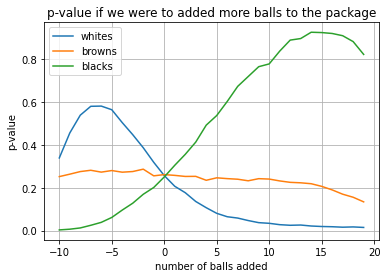

In [9]:
plt.plot(num_added_arr,p_value_arr_w,label="whites")
plt.plot(num_added_arr,p_value_arr_b,label="browns")
plt.plot(num_added_arr,p_value_arr_k,label="blacks")
plt.grid()
plt.xlabel("number of balls added")
plt.ylabel("p-value")
plt.title("p-value if we were to added more balls to the package")
plt.legend()

In [14]:
pW = get_distribution_of_masses_around_N_vector(1000,packege_Nw + 4,packege_Nb,packege_Nk - 4)
print(Statistical_model.get_p_value_of_mass_vector(np.mean(pW[:,0]),np.mean(pW[:,1]),np.mean(pW[:,2])))

0.022356316153922248


In [27]:
num_added_arr_wb = range(-2,7)

p_value_arr_wb = []
for num_added in tqdm.tqdm(num_added_arr_wb):
    pW = get_distribution_of_masses_around_N_vector(1000,packege_Nw + num_added,packege_Nb,packege_Nk - num_added)
    p_value = Statistical_model.get_p_value_of_mass_vector(np.mean(pW[:,0]),np.mean(pW[:,1]),np.mean(pW[:,2]))
    p_value_arr_wb.append(p_value)

100%|██████████| 9/9 [00:10<00:00,  1.16s/it]


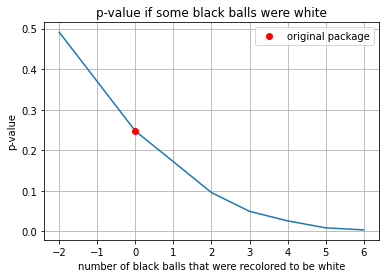

In [31]:
plt.plot(num_added_arr_wb,p_value_arr_wb)
plt.plot([0],[p_value_arr_wb[2]],"or",label="original package")
plt.grid()
plt.xlabel("number of black balls that were recolored to be white")
plt.ylabel("p-value")
plt.title("p-value if some black balls were white")
plt.legend()

In [34]:
1/np.array(p_value_arr_wb)

array([  2.03687286,   2.70873526,   4.04198321,   5.81980426,
        10.43240454,  20.1374502 ,  38.14716981, 111.08791209,
       259.20512821])